# Playground for Pandas.plot() on Vega Airports dataset

### 1️⃣ Imports and loading DS

In [1]:
print("My functions import")

from Classes.Py.DotDict import DotDict
from Classes.Py.SuppressStdOut import SuppressStdout

from Functions.General_Func import print_X
from Functions.Airports_Helpers import get_wiki_airports, get_wiki_airports_US

print("...Done")

My functions import
...Done


In [2]:
print_X("General Imports")

import gc
import pandas as pd
import numpy as np
from dtale import show as dt_show
from matplotlib import pyplot as plt

from seaborn import heatmap
import plotly.graph_objects as go

print("...Done")

======================= General Imports =======================
...Done


#### EDA -- First Look at the data
* num of Flights by Year / Month
* mapping of Airports to States

In [3]:
df_flights = pd.read_pickle('./Data/vega_datasets.pkl').loc['flights-3m.csv']['DF']
# df_flights = pd.read_csv('https://raw.githubusercontent.com/vega/vega-datasets/main/data/flights-3m.csv')

In [4]:
# from math import ceil
print_X("Initially loaded")
df_flights[:3]

====================== Initially loaded ======================


,date,delay,distance,origin,destination
0,1010001,14,405,MCI,MDW
1,1010530,-11,370,LAX,PHX
2,1010540,5,389,ONT,SMF


In [5]:
print_X("Converted date")
df_flights['date'] =  pd.to_datetime(df_flights['date'], unit="m")
df_flights[:3]

======================= Converted date =======================


,date,delay,distance,origin,destination
0,1971-12-03 09:21:00,14,405,MCI,MDW
1,1971-12-03 18:10:00,-11,370,LAX,PHX
2,1971-12-03 18:20:00,5,389,ONT,SMF


In [23]:
print_X("NaN Count by Columns")
df_flights.isna().sum()

==================== NaN Count by Columns ====================


date           0
delay          0
distance       0
origin         0
destination    0
dtype: int64

In [7]:
print_X("Descr")
df_flights.describe(include='all', datetime_is_numeric=True)

============================ Descr ============================


,date,delay,distance,origin,destination
count,231083,231083.000000,231083.000000,231083,231083
unique,NaN,NaN,NaN,59,59
top,NaN,NaN,NaN,PHX,PHX
freq,NaN,NaN,NaN,15186,15144
mean,1974-02-09 14:11:09.424405952,8.014523,506.802508,NaN,NaN
min,1971-12-03 09:21:00,-58.000000,108.000000,NaN,NaN
25%,1972-05-05 08:25:00,-5.000000,283.000000,NaN,NaN
50%,1974-02-02 15:10:00,0.000000,370.000000,NaN,NaN
75%,1975-11-17 22:40:00,12.000000,611.000000,NaN,NaN
max,1976-04-19 04:17:00,509.000000,2298.000000,NaN,NaN


In [8]:
print_X("Num of flights by Year/Month")
df_flights.groupby([df_flights['date'].dt.year, df_flights['date'].dt.month]).size()

================ Num of flights by Year/Month ================


date  date
1971  12      11021
1972  1       11717
      2        9983
      3       13238
      4        9914
      5       10790
      6       12548
1973  10       2706
      11       9939
      12      12811
1974  1       10408
      2        9949
      3       13538
      4        9878
      5        2589
1975  9        5410
      10       9839
      11      10196
      12      13311
1976  1       10052
      2       12176
      3       11491
      4        7579
dtype: int64

==================== Flights by Year-Month ====================


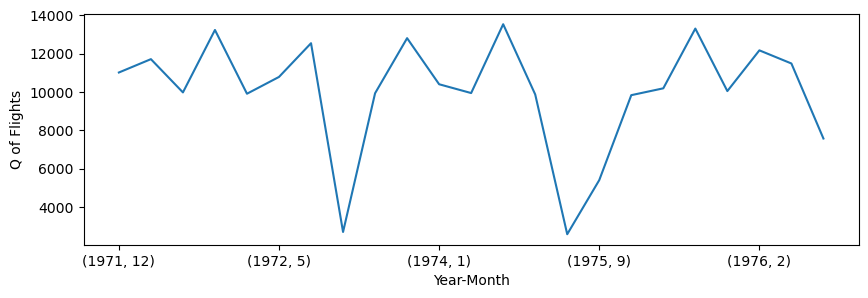

In [9]:
print_X("Flights by Year-Month")

(
    df_flights.groupby([df_flights['date'].dt.year, df_flights['date'].dt.month])
        .size()
        .plot(kind='line', figsize=(10,3))
)

plt.xlabel('Year-Month')
plt.ylabel('Q of Flights')

plt.show()

In [22]:
print_X("Flights by Year-Month, Matrix")

YM_Matrix = (
    df_flights.groupby([df_flights['date'].dt.year, df_flights['date'].dt.month])
        .size()
        .unstack()
        .rename_axis(columns='months', index='years')
        .applymap(lambda x: f"{x:,.0f}" if pd.notna(x) else x)
        # .applymap(lambda x: f"{int(x/1000)}K" if pd.notna(x) else x)
        .fillna("--")
)
YM_Matrix

================ Flights by Year-Month, Matrix ================


months,1,2,3,4,5,6,9,10,11,12
years,,,,,,,,,,
1971,--,--,--,--,--,--,--,--,--,"11,021"
1972,"11,717","9,983","13,238","9,914","10,790","12,548",--,--,--,--
1973,--,--,--,--,--,--,--,"2,706","9,939","12,811"
1974,"10,408","9,949","13,538","9,878","2,589",--,--,--,--,--
1975,--,--,--,--,--,--,"5,410","9,839","10,196","13,311"
1976,"10,052","12,176","11,491","7,579",--,--,--,--,--,--


🚩 NaN periods are obvious data inconsistency

#### Vizualisiing as a Heatmap

======================= Seaborn Heatmap =======================


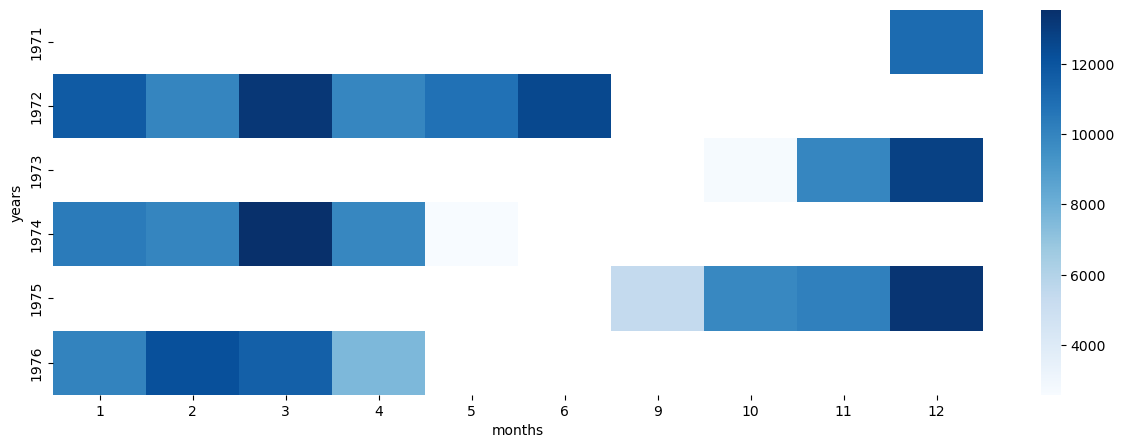

In [26]:
print_X("Seaborn Heatmap")

fig, ax = plt.subplots(figsize=(15, 5))
heatmap(YM_Matrix.sort_index(), cmap='Blues')
plt.show()

Due to the limitations of annotating data within visuals using Sns / Matplotlib, the same chart has been recreated using Plotly 

In [18]:
print_X("Plotly Heatmap")
import plotly.graph_objects as go

# Create the heatmap figure
fig = go.Figure(go.Heatmap(
    x=YM_Matrix.columns, 
    y=YM_Matrix.index, 
    z=YM_Matrix.values,
    colorscale='Blues'
)).update_layout(
        title='Year-Month Heatmap',
        xaxis_title='Months',
        yaxis_title='Years'
)

fig.show()

======================= Plotly Heatmap =======================


In [25]:
with SuppressStdout():
    YM_Matrix = None
    gc.collect()

## 2️⃣ Mapping Airports to Wiki data to fetch Country

In [11]:
wiki_airports = get_wiki_airports().set_index('IATA Code')
print_X("Data from Wikipedia retrieved")

================ Data from Wikipedia retrieved ================


In [12]:
print_X("Sampe from Wikipedia")
wiki_airports.loc['SFJ']

==================== Sampe from Wikipedia ====================


Continent    North America
Country          Greenland
Location     Kangerlussuaq
Name: SFJ, dtype: object

In [13]:
print_X("Airports_DF Countries:")
(
    pd.DataFrame(
        df_flights['destination'].unique(), 
        columns=['IATA Code']
            ).set_index('IATA Code')

            .merge(wiki_airports, left_index=True, right_index=True)['Country']
            .unique()
)

=================== Airports_DF Countries: ===================


array(['United States'], dtype=object)

In [14]:
wiki_airports = None

with SuppressStdout():
    gc.collect()

...So in this dataset we have only Airports from United States...

In [2]:
wiki_airports_us = get_wiki_airports_US()

### 2. EDA -- Flights from and to Airports
Hottest Airports

============= Head and Tail of Destination Count =============


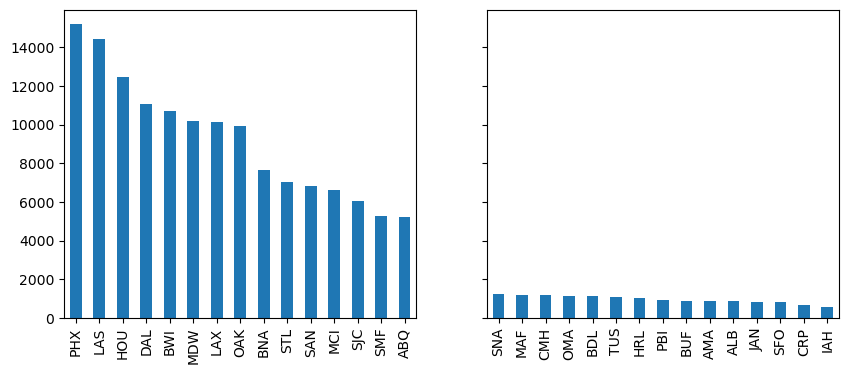

In [28]:
print_X("Head and Tail of Destination Count")
fig, axs = plt.subplots(1,2, figsize=(10,4), sharey=True)

df_flights_origin = df_flights['origin'].value_counts()

(
    df_flights_origin
        .nlargest(15)
        .sort_values(ascending=False)
        .plot(kind='bar', ax=axs[0])
)
(
    df_flights_origin
        .nsmallest(15)
        .sort_values(ascending=False)
        .plot(kind='bar', ax=axs[1])
)

with SuppressStdout():
    del df_flights_origin
    gc.collect()

In [17]:
# Group by origin and destination, count rows, and merge the results
print_X("Origin_Count and Destination_Count over same Index/Airport")

airports_count = (
    pd.concat(
        [
            df_flights.groupby('origin').size().rename('origin'),
            df_flights.groupby('destination').size().rename('destination')
        ],axis=1, sort=True)
            .fillna(0)
            .assign(diff = lambda x: x['origin'] - x['destination'])
            .sort_values(by='diff', ascending=False)
)

airports_count.query("origin != destination")[:10]

= Origin_Count and Destination_Count over same Index/Airport =


,origin,destination,diff
PHX,15186,15144,42
HOU,12453,12430,23
DAL,11090,11078,12
SMF,5271,5260,11
MDW,10167,10159,8
CLE,1851,1844,7
MSY,5056,5049,7
SLC,3377,3372,5
PBI,905,901,4
CRP,641,637,4


In theory Origin_Count should be == Destination_Count. <br>
    &nbsp; Aircraft arives and departures from the same Airport. <br>
    &nbsp; Firstly this Airport is Destination, later, the same Airport is Origin for the same aircraft. 
    
    🚩 In the real project it would be important to address the issue of "lost plains" separately, investigating correlation to blank periods / gaps in data.

### EDA -- Flights / Destination by Years. 
Trend of the hottest Airports